In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [2]:
# Read the file
data1 = np.genfromtxt('bfieldelevtromagnet_19032021.txt',skip_header=1,skip_footer=1,delimiter=";")
bx1, by1, bz1 = [data1[:,i] for i in range(0,3)]
data2 = np.genfromtxt('bfieldelevtromagnetAND1500G_19032021.txt',skip_header=1,skip_footer=1,delimiter=";",usecols = (0,1,2))
bx2, by2, bz2 = [data2[:,i] for i in range(0,3)]
data3 = np.genfromtxt('bfieldelevtromagnetAND2500G_19032021.txt',skip_header=1,skip_footer=1,delimiter=";",usecols = (0,1,2))
bx3, by3, bz3 = [data3[:,i] for i in range(0,3)]
data4 = np.genfromtxt('bfieldelevtromagnetAND3500G_19032021_orientation.txt',skip_header=1,skip_footer=1,delimiter=";",usecols = (0,1,2))
bx4, by4, bz4 = [data4[:,i] for i in range(0,3)]

In [3]:
# Not all files has the same amount of data. 
# Here you add zeros at the end of each file component, so all have the same amount
bx2 = np.pad(bx2, (0, len(bx1) - len(bx2)), 'constant')
bx3 = np.pad(bx3, (0, len(bx1) - len(bx3)), 'constant')
bx4 = np.pad(bx4, (0, len(bx1) - len(bx4)), 'constant')
by2 = np.pad(by2, (0, len(by1) - len(by2)), 'constant')
by3 = np.pad(by3, (0, len(by1) - len(by3)), 'constant')
by4 = np.pad(by4, (0, len(by1) - len(by4)), 'constant')
bz2 = np.pad(bz2, (0, len(bz1) - len(bz2)), 'constant')
bz3 = np.pad(bz3, (0, len(bz1) - len(bz3)), 'constant')
bz4 = np.pad(bz4, (0, len(bz1) - len(bz4)), 'constant')

In [4]:
# Table for X axis 
l1 = {'$B_{x1}$':bx1, '$B_{x2}$':bx2,'$B_{x3}$':bx3, '$B_{x4}$':bx4}  # Create a dictionary
df1=pd.DataFrame(l1)                                                  # Create a table with pandas
df1

,$B_{x1}$,$B_{x2}$,$B_{x3}$,$B_{x4}$
0,3.53,1.27,2.25,16.07
1,3.53,0.98,1.96,15.97
2,3.63,1.27,2.06,15.78
3,3.33,0.88,1.76,16.17
4,3.82,0.98,2.16,16.27
...,...,...,...,...
241,0.98,0.00,0.00,0.00
242,0.98,0.00,0.00,0.00
243,1.27,0.00,0.00,0.00
244,1.18,0.00,0.00,0.00


In [5]:
# Table for Y axis 
l2 = {'$B_{y1}$':by1, '$B_{y2}$':by2,'$B_{y3}$':by3, '$B_{y4}$':by4}  # Create a dictionary
df2=pd.DataFrame(l2)                                                  # Create a table with pandas
df2

,$B_{y1}$,$B_{y2}$,$B_{y3}$,$B_{y4}$
0,-1.47,-0.39,-1.08,9.41
1,-1.18,-0.39,-1.37,9.51
2,-1.86,-0.39,-0.69,9.60
3,-1.37,-0.59,-1.08,9.60
4,-1.57,-0.69,-1.08,9.51
...,...,...,...,...
241,-0.39,0.00,0.00,0.00
242,-0.59,0.00,0.00,0.00
243,-0.59,0.00,0.00,0.00
244,-0.49,0.00,0.00,0.00


In [6]:
# Table for Z axis 
l3 = {'$B_{z1}$':bz1, '$B_{z2}$':bz2,'$B_{z3}$':bz3, '$B_{z4}$':bz4}  # Create a dictionary
df3=pd.DataFrame(l3)                                                  # Create a table with pandas
df3

,$B_{z1}$,$B_{z2}$,$B_{z3}$,$B_{z4}$
0,1.47,0.29,-0.1,-25.58
1,1.57,0.49,0.0,-25.58
2,1.57,0.20,0.1,-25.58
3,1.47,0.20,-0.2,-25.68
4,1.37,0.20,-0.1,-25.48
...,...,...,...,...
241,0.29,0.00,0.0,0.00
242,0.39,0.00,0.0,0.00
243,0.29,0.00,0.0,0.00
244,0.29,0.00,0.0,0.00


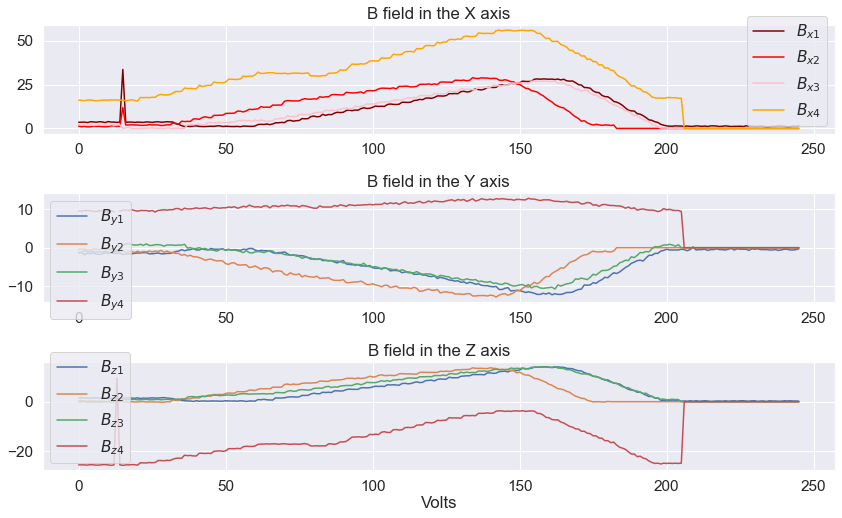

In [7]:
# Making plots
import matplotlib as mpl
mpl.rc('font', size=14)
import seaborn as sns
sns.set(font_scale=1.4)
fig, axes = plt.subplots(3, 1, figsize=(12, 7.5), tight_layout=True)
df1.plot(ax=axes[0], kind='line', title="B field in the X axis", 
         color=['maroon','red', 'pink','orange'])
df2.plot(ax=axes[1], kind='line', title="B field in the Y axis")
df3.plot(ax=axes[2], kind='line', title="B field in the Z axis")
plt.xlabel("Volts", labelpad=2);

In [8]:
# Here we put all dictionaries together by creating a base dictionary and updating it up with 
# the dictionary of the next component in the following order (x,y,z)
dict1 = {'$B_{x1}$':bx1, '$B_{x2}$':bx2,'$B_{x3}$':bx3, '$B_{x4}$':bx4} # original dictionary
def Merge(dict1, dict2):
    return(dict1.update(dict2))                                         # updating dictionary
table = Merge(dict1, l2)    # adding the 2nd dictionary (Y axis) to the 1st (X axis)
table = Merge(dict1, l3)    # adding the 3rd dictionary (Z axis) to the updated 1st (X and Y axis)
# print(table1)              # if you print the "table" you will read "None"

In [9]:
# create the table for all the components of the B field (X, Y, Z)
dt = pd.DataFrame(dict1)
dt

,$B_{x1}$,$B_{x2}$,$B_{x3}$,$B_{x4}$,$B_{y1}$,$B_{y2}$,$B_{y3}$,$B_{y4}$,$B_{z1}$,$B_{z2}$,$B_{z3}$,$B_{z4}$
0,3.53,1.27,2.25,16.07,-1.47,-0.39,-1.08,9.41,1.47,0.29,-0.1,-25.58
1,3.53,0.98,1.96,15.97,-1.18,-0.39,-1.37,9.51,1.57,0.49,0.0,-25.58
2,3.63,1.27,2.06,15.78,-1.86,-0.39,-0.69,9.60,1.57,0.20,0.1,-25.58
3,3.33,0.88,1.76,16.17,-1.37,-0.59,-1.08,9.60,1.47,0.20,-0.2,-25.68
4,3.82,0.98,2.16,16.27,-1.57,-0.69,-1.08,9.51,1.37,0.20,-0.1,-25.48
...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.98,0.00,0.00,0.00,-0.39,0.00,0.00,0.00,0.29,0.00,0.0,0.00
242,0.98,0.00,0.00,0.00,-0.59,0.00,0.00,0.00,0.39,0.00,0.0,0.00
243,1.27,0.00,0.00,0.00,-0.59,0.00,0.00,0.00,0.29,0.00,0.0,0.00
244,1.18,0.00,0.00,0.00,-0.49,0.00,0.00,0.00,0.29,0.00,0.0,0.00


In [10]:
def color_negative_red(value):
  """
  Colors elements in a dateframe blue if positive and red if negative. Black for NaN values.
  """
  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'blue'
  else:
    color = 'black'
  return 'color: %s' % color

In [11]:
dt1 = ( dt.style.applymap(color_negative_red, subset=['$B_{y1}$','$B_{y2}$','$B_{y3}$','$B_{y4}$',
                                                    '$B_{z1}$','$B_{z2}$','$B_{z3}$','$B_{z4}$'])
       .format(  {'$B_{y3}$': "{:.3}"}  )   )

## This is how it looks in Jupyter, cannot be seen in github

![table1](https://raw.githubusercontent.com/unextraterrestresoy/How-to-call-txt-file-genfromtxt---plots-using-Pandas/main/table1.JPG)

In [12]:
dt2 = dt.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

## This is how it looks in Jupyter, cannot be seen in github

![table2](https://raw.githubusercontent.com/unextraterrestresoy/How-to-call-txt-file-genfromtxt---plots-using-Pandas/main/table2.JPG)

In [13]:
# Set colormap equal to seaborns light green color palette (check the color chart image at the end of the notebook)
cm = sns.light_palette("goldenrod", as_cmap=True)
dt3 = ( dt.style
       .background_gradient(cmap=cm, subset=['$B_{y1}$','$B_{y2}$','$B_{y3}$','$B_{y4}$',
                                                    '$B_{z1}$','$B_{z2}$','$B_{z3}$','$B_{z4}$'])
       .highlight_max(subset=['$B_{y1}$','$B_{y2}$','$B_{y3}$','$B_{y4}$',
                                                    '$B_{z1}$','$B_{z2}$','$B_{z3}$','$B_{z4}$']
                     ,color = 'sienna')
       .set_caption('This is a custom caption.')
       .format(  {'$B_{y3}$': "{:.3}"}  )   )

## This is how it looks in Jupyter, cannot be seen in github

![table3](https://raw.githubusercontent.com/unextraterrestresoy/How-to-call-txt-file-genfromtxt---plots-using-Pandas/main/table3.JPG)

In [14]:
dt4 = ( dt.style
       .background_gradient(cmap=cm, subset=['$B_{y1}$','$B_{y2}$','$B_{y3}$','$B_{y4}$',
                                                    '$B_{z1}$','$B_{z2}$','$B_{z3}$','$B_{z4}$'])
       .highlight_max(subset=['$B_{y1}$','$B_{y2}$','$B_{y3}$','$B_{y4}$',
                                                    '$B_{z1}$','$B_{z2}$','$B_{z3}$','$B_{z4}$']
                     ,color = 'red')
       .set_caption('This is a custom caption.')
       .format(  {'$B_{y3}$': "{:.3}"}  )
      .to_excel('styled.xlsx', engine='openpyxl'))    # create an Excel file by exporting all data to a .xlsx file
dt4

# That is how it looks the file in Excel now

![excel](https://raw.githubusercontent.com/unextraterrestresoy/How-to-call-txt-file-genfromtxt---plots-using-Pandas/main/excel.JPG)


---

# Color chart
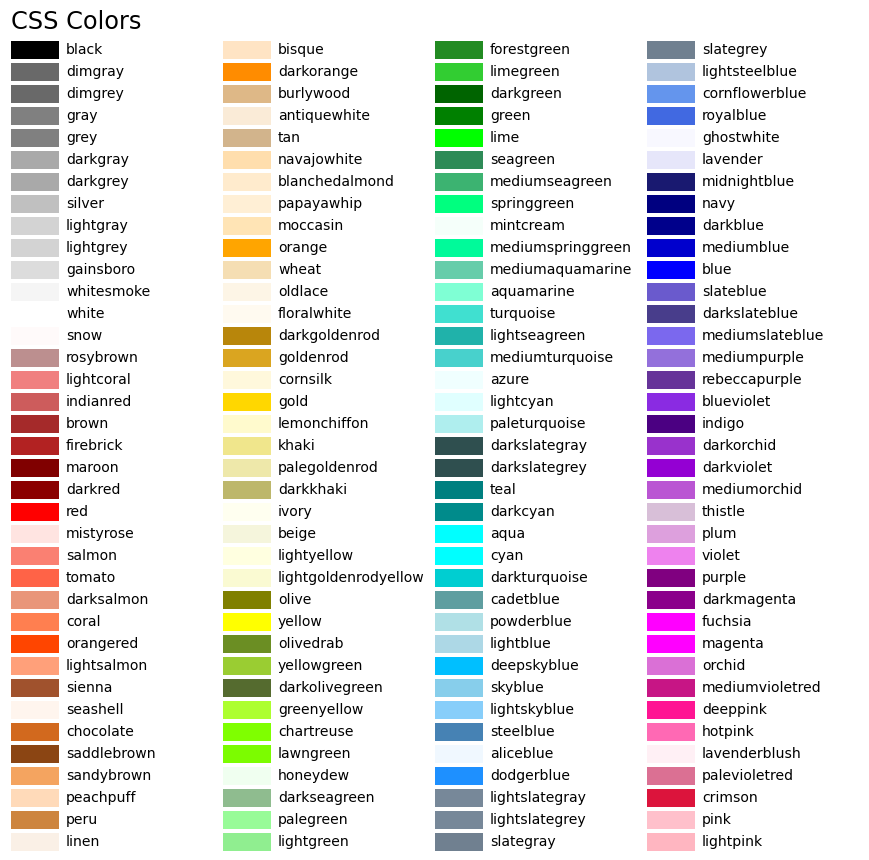

In [15]:
%reload_ext version_information
v = %version_information pandas, numpy, matplotlib
import IPython.display
IPython.display.display_pretty(v)

Software versions
Python 3.8.3 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.16.1
OS Windows 10 10.0.19041 SP0
pandas 1.0.5
numpy 1.18.5
matplotlib 3.2.2
Thu Mar 25 01:21:33 2021 Eastern Daylight Time